In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Visualization

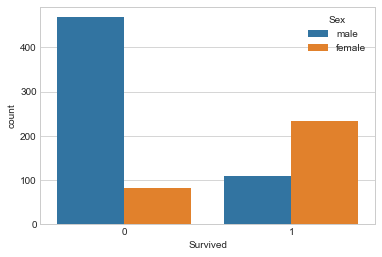

In [8]:
#Calculating the number of male/female passenger Survived.
sns.countplot(x='Survived',data=train_df,hue='Sex')

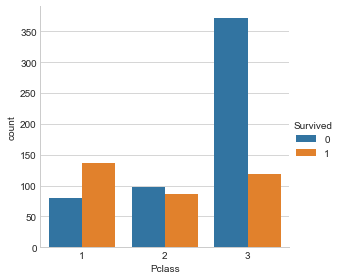

In [9]:
#Plotting the percentage of passengers survived according to the Class they were in. 
sns.factorplot(x='Pclass',data=train_df,kind='count',hue='Survived')

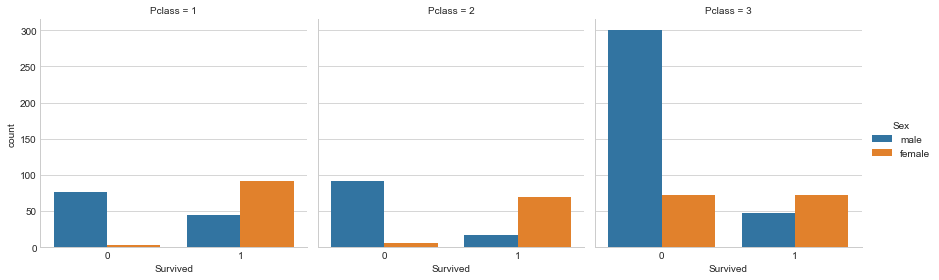

In [10]:
#Further breaking the above graph to male/female level
sns.factorplot(x='Survived',data=train_df,hue='Sex',kind='count',col='Pclass')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


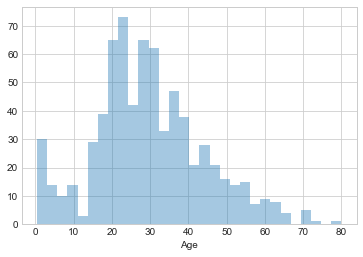

In [11]:
#Age distribution of the passengers
sns.distplot(train_df['Age'].dropna(),bins=30,kde=False)

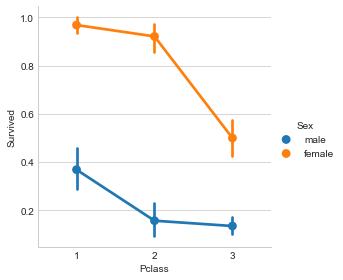

In [12]:
#Survivers according to their gender and Pclass
sns.factorplot(x='Pclass',y='Survived',data=train_df,hue='Sex')

# Data Cleaning

In [13]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [14]:
#Dropping Cabin column from both datasets
train_df.drop(['Cabin'],inplace=True,axis=1)
test_df.drop(['Cabin'],inplace=True,axis=1)

In [15]:
train_df['Embarked']=train_df['Embarked'].fillna('S')

In [16]:
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


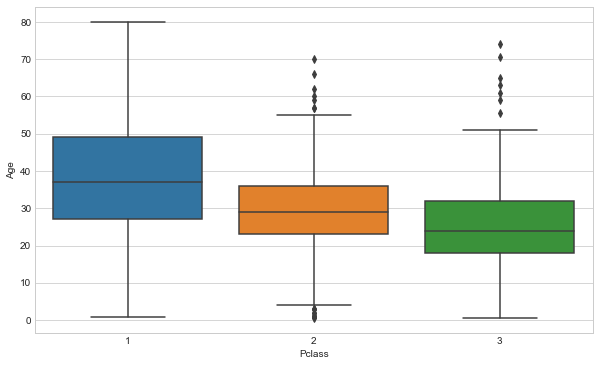

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=train_df)

In [19]:
def age_mean(x):
    Age,Pclass=x
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 28
        else:
            return 24
    else:
        return Age

In [20]:
train_df['Age']=train_df[['Age','Pclass']].apply(age_mean,axis=1)

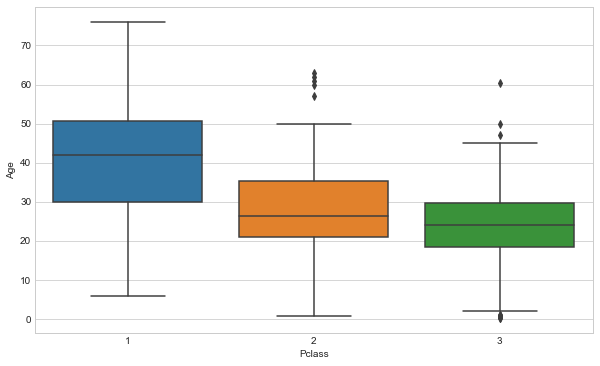

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=test_df)

In [22]:
def age_mean_test(x):
    Age,Pclass=x
    if pd.isnull(Age):
        if Pclass==1:
            return 43
        elif Pclass==2:
            return 26
        else:
            return 25
    else:
        return Age

In [23]:
test_df['Age']=test_df[['Age','Pclass']].apply(age_mean_test,axis=1)

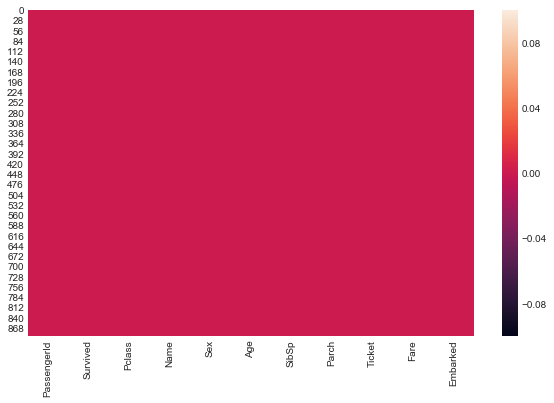

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isnull())

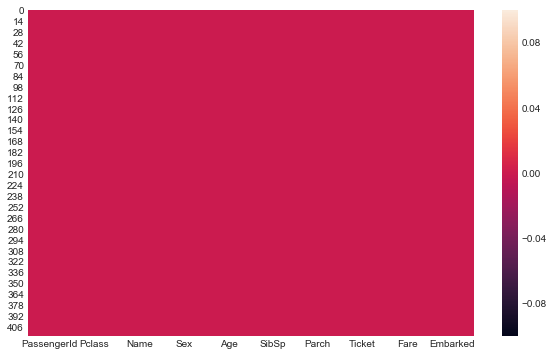

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(test_df.isnull())

In [27]:
def m_f(x):
    Sex=x
    if Sex=='male':
        return 1
    else:
        return 0

In [28]:
train_df['Sex']=train_df['Sex'].apply(m_f)
test_df['Sex']=test_df['Sex'].apply(m_f)

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [30]:
def name(x):
    Name=x
    if Name=='Mr.':
        return 'Mr'
    elif Name=='Miss.':
        return 'Miss'
    elif Name=='Mrs.':
        return 'Mrs'
    else:
        return 'other'

In [31]:
train_df['Name']=train_df['Name'].map(lambda x: x.split(' ')[1])

In [32]:
train_df['Name']=train_df['Name'].apply(name)

In [33]:
test_df['Name']=test_df['Name'].map(lambda x: x.split(' ')[1])

In [34]:
test_df['Name']=test_df['Name'].apply(name)

In [35]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(3)
memory usage: 66.2+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null f

In [37]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,S


In [38]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,Mr,1,34.5,0,0,330911,7.8292,Q
1,893,3,Mrs,0,47.0,1,0,363272,7.0000,S
2,894,2,Mr,1,62.0,0,0,240276,9.6875,Q
3,895,3,Mr,1,27.0,0,0,315154,8.6625,S
4,896,3,Mrs,0,22.0,1,1,3101298,12.2875,S


In [39]:
nametrain=pd.get_dummies(train_df['Name'],drop_first=True)
nametest=pd.get_dummies(test_df['Name'],drop_first=True)

In [40]:
embarkedtrain=pd.get_dummies(train_df['Embarked'],drop_first=True)
embarkedtest=pd.get_dummies(test_df['Embarked'],drop_first=True)

In [41]:
pclasstrain=pd.get_dummies(train_df['Pclass'],drop_first=True)
pclasstest=pd.get_dummies(test_df['Pclass'],drop_first=True)

In [42]:
tr_df=pd.concat([train_df,nametrain,embarkedtrain,pclasstrain],axis=1)
te_df=pd.concat([test_df,nametest,embarkedtest,pclasstest],axis=1)

In [43]:
te_df.drop(['Name','Embarked','Pclass','Ticket'],axis=1,inplace=True)
tr_df.drop(['Name','Embarked','Pclass','Ticket'],axis=1,inplace=True)

In [44]:
tr_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Mr,Mrs,other,Q,S,2,3
0,1,0,1,22.0,1,0,7.2500,1,0,0,0,1,0,1
1,2,1,0,38.0,1,0,71.2833,0,1,0,0,0,0,0
2,3,1,0,26.0,0,0,7.9250,0,0,0,0,1,0,1
3,4,1,0,35.0,1,0,53.1000,0,1,0,0,1,0,0
4,5,0,1,35.0,0,0,8.0500,1,0,0,0,1,0,1


In [ ]:
#Applying Mean Normalization to both datasets

In [45]:
tr_df['Age']=(tr_df['Age']-tr_df['Age'].mean())/(tr_df['Age'].max()-tr_df['Age'].min())
tr_df['Fare']=(tr_df['Fare']-tr_df['Fare'].mean())/(tr_df['Fare'].max()-tr_df['Fare'].min())
tr_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Mr,Mrs,other,Q,S,2,3
0,1,0,1,-0.088641,1,0,-0.048707,1,0,0,0,1,0,1
1,2,1,0,0.112414,1,0,0.076277,0,1,0,0,0,0,0
2,3,1,0,-0.038377,0,0,-0.047390,0,0,0,0,1,0,1
3,4,1,0,0.074716,1,0,0.040786,0,1,0,0,1,0,0
4,5,0,1,0.074716,0,0,-0.047146,1,0,0,0,1,0,1


In [46]:
te_df['Age']=(te_df['Age']-te_df['Age'].mean())/(te_df['Age'].max()-te_df['Age'].min())
te_df['Fare']=(te_df['Fare']-te_df['Fare'].mean())/(te_df['Fare'].max()-te_df['Fare'].min())
tr_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Mr,Mrs,other,Q,S,2,3
0,1,0,1,-0.088641,1,0,-0.048707,1,0,0,0,1,0,1
1,2,1,0,0.112414,1,0,0.076277,0,1,0,0,0,0,0
2,3,1,0,-0.038377,0,0,-0.047390,0,0,0,0,1,0,1
3,4,1,0,0.074716,1,0,0.040786,0,1,0,0,1,0,0
4,5,0,1,0.074716,0,0,-0.047146,1,0,0,0,1,0,1


In [47]:
x_train=tr_df[['Sex', 'Age', 'SibSp', 'Parch','Fare', 'Mr', 'Mrs', 'other', 'Q', 'S',2,3]]
y_train=tr_df['Survived']

In [48]:
x_test=te_df[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Mr','Mrs', 'other', 'Q', 'S',2,3]]

In [49]:
#Data looks clean and nice, it's time for the model training.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


#LogisticRegression

In [51]:
lr=LogisticRegression()

In [52]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
lr.score(x_train,y_train)

0.8204264870931538

#SVM

In [59]:
svc=SVC()

In [60]:
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
svc.score(x_train,y_train)

0.8282828282828283

#Random Forest

In [64]:
rnf=RandomForestClassifier()

In [65]:
rnf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
rnf.score(x_train,y_train)

0.9696969696969697

In [ ]:
a